# Project: EDA with Pandas
Abigail Nzambi

DVF-PT-05

## 1. Business understanding

Microsoft, a Technology company, is one of the largest and most influential tech companies in the world. It is based in based in the United States, and It was founded in 1975 by Bill Gates and Paul Allen. The core areas in which it operates in are; Software, Cloud Computing, Hardware, Business & Enterprise Solutions and Artificial Intelligence & Research.

## 2. Problem statement
Microsoft wants to enter the film industry by launching a new movie studio.  To succeed in this highly competitive market, they need to understand which factors lead to the success of a company in the movie industry..

## 3. Objectives

* To analyze the distribution of movie runtimes.

* To determine the average movie rating across different runtime categories.

* To assess the impact of the number of genres in a movie on the average movie rating.

* To evaluate the correlation between the number of genres, number of writers, number of directors, and average movie rating.

* To examine the trend of movie runtimes over time.

## 4. Data understanding

In [36]:
# Importing libraries
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading and reading the zipped csv file**

I decided to use the data from title.basics.csv, title.crew.csv, title.principals.csv, title.ratings.csv


In [37]:

with gzip.open('/content/imdb.title.basics.csv.gz', 'rt') as a:
    df_title_basics = pd.read_csv(a)

with gzip.open('/content/imdb.title.crew.csv.gz', 'rt') as b:
    df_title_crew = pd.read_csv(b)

with gzip.open('/content/imdb.title.principals.csv.gz', 'rt') as c:
    df_title_principals = pd.read_csv(c)

with gzip.open('/content/imdb.title.ratings.csv.gz', 'rt') as d:
    df_title_ratings = pd.read_csv(d)

**Merging Datasets**

These files have a common column **'tconst'**, which is what I will use to merge the datasets on.



In [38]:
merged_df = df_title_basics.merge(df_title_ratings, on='tconst', how='left')
merged_df = merged_df.merge(df_title_principals, on='tconst', how='left')
merged_df = merged_df.merge(df_title_crew, on='tconst', how='left')

**Exploring the shape of the data**

In [39]:
# Shape of the Data that shows the number of rows and columns of the merged dataset
merged_df.shape

(1030876, 15)

In [40]:
# Showing the first few rows of the merged dataset
display(merged_df.head())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,nconst,category,job,characters,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,10.0,nm0006210,composer,NaN,NaN,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,1.0,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,2.0,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,3.0,nm0756379,actor,NaN,"[""Ganeshi N. Prasad""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,4.0,nm0474876,actor,NaN,"[""Dwarka N. Prasad""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"


In [41]:
# getting the descriptive statistics of the numeric columns
merged_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,ordering
count,1.030876e+06,828893.000000,629926.000000,6.299260e+05,1.028186e+06
mean,2.014607e+03,90.390172,6.261943,4.108752e+03,4.739847e+00
std,2.742710e+00,111.022517,1.452052,3.275891e+04,2.747446e+00
min,2.010000e+03,1.000000,1.000000,5.000000e+00,1.000000e+00
25%,2.012000e+03,76.000000,5.400000,1.600000e+01,2.000000e+00
50%,2.015000e+03,90.000000,6.400000,6.500000e+01,4.000000e+00
75%,2.017000e+03,102.000000,7.300000,3.670000e+02,7.000000e+00
max,2.115000e+03,51420.000000,10.000000,1.841066e+06,1.000000e+01


In [42]:
# Getting the information on the column types and the number of non-null values
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030876 entries, 0 to 1030875
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   tconst           1030876 non-null  object 
 1   primary_title    1030870 non-null  object 
 2   original_title   1030849 non-null  object 
 3   start_year       1030876 non-null  int64  
 4   runtime_minutes  828893 non-null   float64
 5   genres           1007380 non-null  object 
 6   averagerating    629926 non-null   float64
 7   numvotes         629926 non-null   float64
 8   ordering         1028186 non-null  float64
 9   nconst           1028186 non-null  object 
 10  category         1028186 non-null  object 
 11  job              177684 non-null   object 
 12  characters       393360 non-null   object 
 13  directors        1014587 non-null  object 
 14  writers          861040 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 118.0+ MB


## 5. Data Cleaning

**Removing Duplicates**

In [43]:
# Remove duplicates based on the column tconst
clean_df = merged_df.drop_duplicates(subset=['tconst'])

**Feature Reduction**

In [44]:
# Remove the column name nconst - it does not provide much information
clean_df = clean_df.drop(columns=['nconst'])

# Remove the column name original_title - it has similar information to primary_title
clean_df = clean_df.drop(columns=['original_title'])

**Handling Missing Values**

In [45]:
# Replace NaN in averagerating and numvotes with the value 0
clean_df['averagerating'] = clean_df['averagerating'].fillna(0)
clean_df['numvotes'] = clean_df['numvotes'].fillna(0)

**Assessing Missing Data**

In [46]:
# Calculate the percentage of missing values for each column
missing_percentage = (clean_df.isnull().sum() / len(clean_df)) * 100

# Round the percentage to 0 decimal points
missing_percentage = missing_percentage.round(0)

# Display the percentage of missing values
display(missing_percentage)

,0
tconst,0.0
primary_title,0.0
start_year,0.0
runtime_minutes,22.0
genres,4.0
averagerating,0.0
numvotes,0.0
ordering,2.0
category,2.0
job,93.0


**Dropping columns with many missing Data**

In [47]:
# Get the list of columns to drop based on the missing percentage threshold (50%)
columns_to_drop = missing_percentage[missing_percentage >= 50].index

# Drop the identified columns from the DataFrame
clean_df = clean_df.drop(columns=columns_to_drop)

**Removing outliers, but first, plotting box plots**

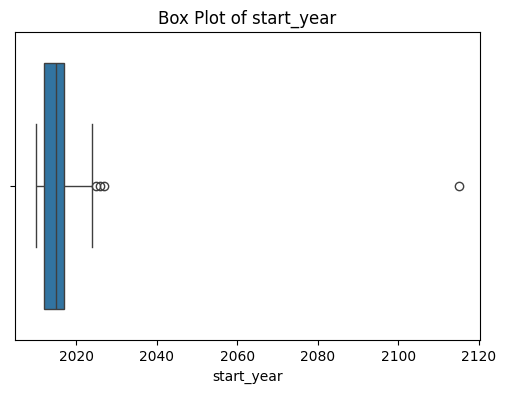

In [48]:
# Boxplot for start_year to detect outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=clean_df['start_year'])
plt.title('Box Plot of start_year')
plt.show()

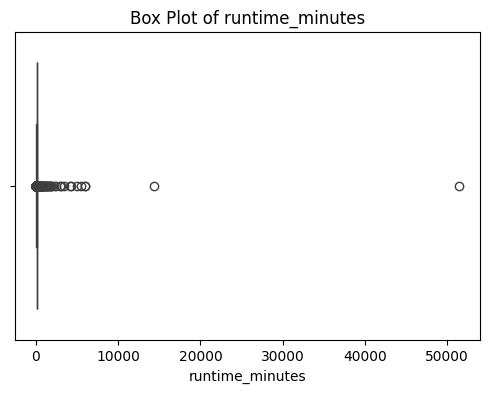

In [49]:
# Boxplot for runtime_minutes to detect outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=clean_df['runtime_minutes'])
plt.title('Box Plot of runtime_minutes')
plt.show()

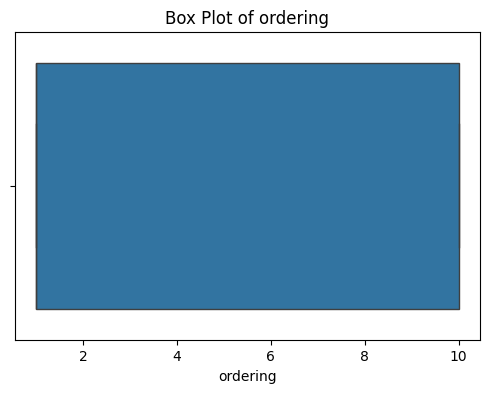

In [50]:
# Boxplot for ordering to detect outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=clean_df['ordering'])
plt.title('Box Plot of ordering')
plt.show()

In [51]:
# Removing outliers in numeric columns using IQR
numeric_cols = ['start_year', 'runtime_minutes', 'ordering']

for col in numeric_cols:
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]

**Removing rows with missing values**

In [52]:
# Remove rows with missing values
clean_df = clean_df.dropna(axis=0)

**Changing data types**

In [53]:
# Convert 'numvotes' and 'ordering' columns to integer type
clean_df['numvotes'] = clean_df['numvotes'].astype(int)
clean_df['ordering'] = clean_df['ordering'].astype(int)

**Feature engineering**

In [54]:
# Creating new columns
clean_df['number of genres'] = clean_df['genres'].str.split(',').str.len()
clean_df['number of writers'] = clean_df['writers'].str.split(',').str.len()
clean_df['number of directors'] = clean_df['directors'].str.split(',').str.len()

In [55]:
runtime_min = clean_df['runtime_minutes'].min()
runtime_max = clean_df['runtime_minutes'].max()

print(runtime_min)
print(runtime_max)

def categorize_runtime(runtime):
    if runtime < 30:
        return '0–30'
    elif runtime < 60:
        return '30–60'
    elif runtime < 90:
        return '60–90'
    elif runtime < 120:
        return '90–120'
    else:
        return '>120'

clean_df['runtime_category'] = clean_df['runtime_minutes'].apply(categorize_runtime)

27.0
142.0


## 6. Exploratory Data Analysis and Visualisations

**1. What is the distribution of movie runtimes?**



87.30769322704401


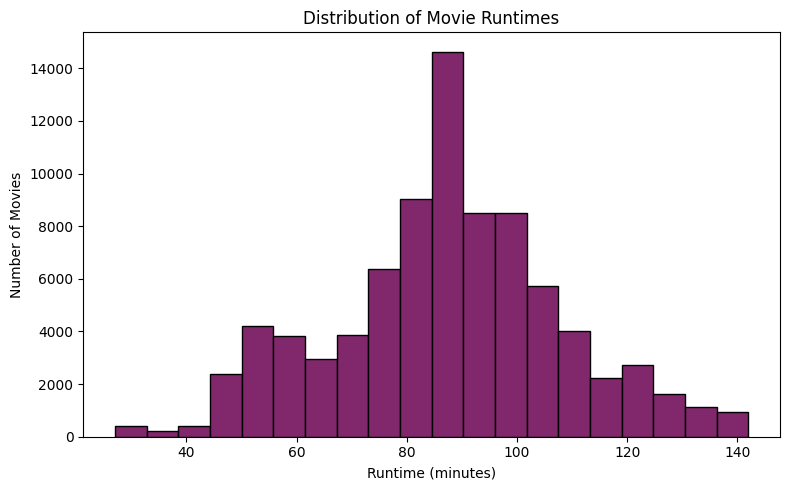

In [56]:
mean_runtime = clean_df['runtime_minutes'].mean()
print(mean_runtime)

# Plotting a histogram of runtime_minutes
plt.figure(figsize=(8, 5))
plt.hist(clean_df['runtime_minutes'], bins=20, color='#81286D', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

Most movies, about 14,500 of them, fall within the 80 to 90-minute range. The distribution is slightly skewed to the right, given that the average runtime is 87 minutes, showing that there are a few significantly longer movies extending beyond 140 minutes. Short films, ie under 50 minutes are comparatively few.

**2. What is the average movie rating by runtime category**

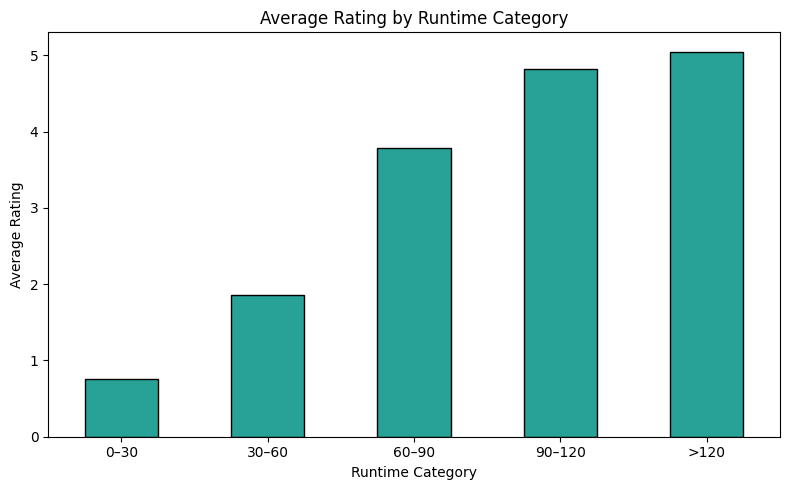

In [57]:
plt.figure(figsize=(8, 5))

# grouping data by runtime_category and getting the mean
avg_ratings_by_runtime = clean_df.groupby('runtime_category')['averagerating'].mean()

# Plotting a bar graph
avg_ratings_by_runtime.plot(kind='bar', color='#28A197', edgecolor='black')

plt.title('Average Rating by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


A comparison between the length of the movies and the average ratings shows that longer movies get a higher rating than shorter movies

**3. How does the number of genres impact average rating of movies.**

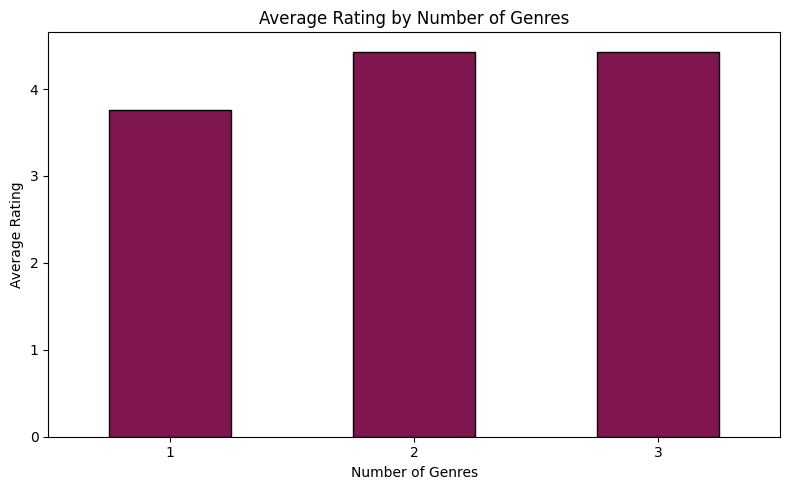

In [58]:
# Average rating by number of genres
avg_by_genres = clean_df.groupby('number of genres')['averagerating'].mean()

# Plotting a bar graph
plt.figure(figsize=(8, 5))
avg_by_genres.plot(kind='bar', color='#801650', edgecolor='black')
plt.title('Average Rating by Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The more the number of genres a movie is, the better the rating, as shown in the bar chart above.



**4. How does number of genres, number of writers, number of directors, and averagerating correrate with each other**


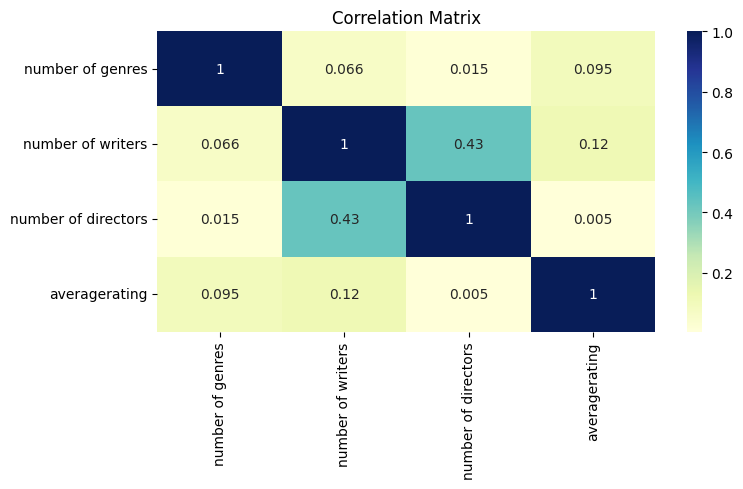

In [59]:
# Selecting relevant numeric columns
correlation_df = clean_df[['number of genres', 'number of writers', 'number of directors', 'averagerating']]

# Computing a correlation matrix
correlation_matrix = correlation_df.corr()

# Plotting a correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


Number of Writers vs. Number of Directors, with a correlation of 0.43 has the strongest correlation. It indicates a moderate positive relationship, suggesting that projects with more writers tend to have more directors and vice versa.

Number of Writers vs. Average Rating, with a correlation of 0.12 has a slightly positive but weak correlation. It suggests that having more writers may slightly improve average ratings, but the impact is minimal.

**How have movie runtimes have evolved over time.**

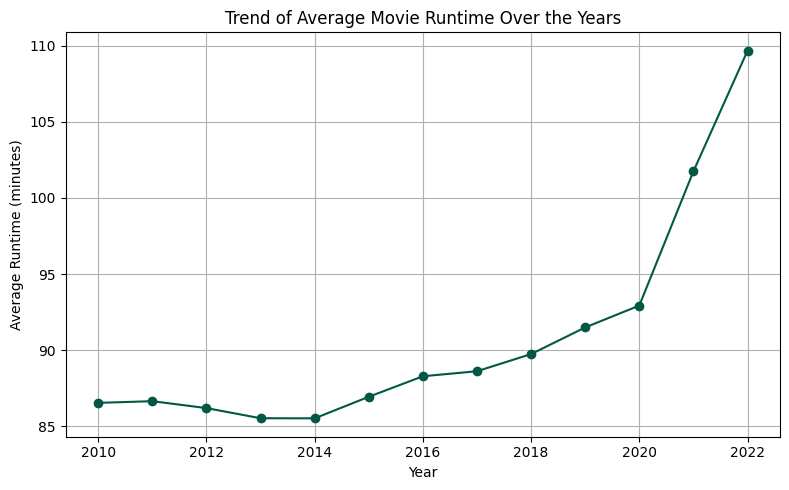

In [60]:
import matplotlib.pyplot as plt

# Step 1: Group by year and calculate average runtime
avg_runtime_per_year = clean_df.groupby('start_year')['runtime_minutes'].mean()

# Step 2: Plot a line graph
plt.figure(figsize=(8, 5))
plt.plot(avg_runtime_per_year.index, avg_runtime_per_year.values, color='#025844', marker='o')

plt.title('Trend of Average Movie Runtime Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()


Between 2010 and 2019, the average runtime remained relatively stable with only gradual increases, but from 2020 onward, there's a steep upward trajectory in the average runtime

# Conclusion

1. Runtime Preferences: The majority of successful movies (about 14,500) fall within the 80–90 minute range.
2. Runtime vs. Ratings: Longer movies tend to receive higher average ratings than shorter ones.
3. Genre diversity: Movies that span multiple genres tend to get better ratings.This suggests that genre diversity enhances audience appeal and reception.
4. Team Size vs. Ratings: Larger writing teams often align with larger directing teams, and more writers might slightly improve storytelling quality, but it's not a strong factor alone.
5. Trend in Movie Length Over Time: There has been a sharp increase in average runtimes in the recent years, suggesting a trend toward longer films, possibly due to streaming platform influence or changing audience preferences.

# Recommendations


1. Microsoft should target the 80–100 minute runtime range for movies to match current audience expectations.
2. Microsoft should aim for genre-blending in movies (e.g., action-comedy, sci-fi-drama) to enhance and viewer experience.
3. The company should build  balanced creative teams of writers and directors to allow for collaborative creativity that supports higher quality films.
4. The company should follow the runtime growth trend. Newer movies are trending longer, particularly post-2020, therefore, it should experiment with slightly longer formats, especially for digital platforms.

These insights reduce financial risk by aligning production choices with proven market demand, and Microsoft can build a strong, profitable foundation in the film industry by working around these insights. This will give Microsoft a competitive edge in the movie production industry.
